In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


In [4]:
# data comes from https://divvy-tripdata.s3.amazonaws.com/index.html


# Data Import and Clean-up

## Import CSVs

In [5]:
jan2021 = pd.read_csv('divvy_monthlytripdata/202101-divvy-tripdata.csv')
feb2021 = pd.read_csv('divvy_monthlytripdata/202102-divvy-tripdata.csv')
mar2021 = pd.read_csv('divvy_monthlytripdata/202103-divvy-tripdata.csv')
apr2021 = pd.read_csv('divvy_monthlytripdata/202104-divvy-tripdata.csv')
may2021 = pd.read_csv('divvy_monthlytripdata/202105-divvy-tripdata.csv')
jun2021 = pd.read_csv('divvy_monthlytripdata/202106-divvy-tripdata.csv')
jul2021 = pd.read_csv('divvy_monthlytripdata/202107-divvy-tripdata.csv')
aug2021 = pd.read_csv('divvy_monthlytripdata/202108-divvy-tripdata.csv')
sep2021 = pd.read_csv('divvy_monthlytripdata/202109-divvy-tripdata.csv')
oct2021 = pd.read_csv('divvy_monthlytripdata/202110-divvy-tripdata.csv')
nov2021 = pd.read_csv('divvy_monthlytripdata/202111-divvy-tripdata.csv')
dec2021 = pd.read_csv('divvy_monthlytripdata/202112-divvy-tripdata.csv')


## Merge Tables

In [6]:
entire_dataset = [jan2021, feb2021, mar2021, apr2021, may2021, jun2021, jul2021, aug2021, sep2021, oct2021, nov2021, dec2021]
df = pd.concat(entire_dataset, ignore_index=True)
#df.columns = df.columns.str.lower()#.str.replace(' ', '_')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


## Null Values

In [7]:
df.isnull().sum()/(len(df))*100


ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    12.346760
start_station_id      12.346706
end_station_name      13.211111
end_station_id        13.211111
start_lat              0.000000
start_lng              0.000000
end_lat                0.085272
end_lng                0.085272
member_casual          0.000000
dtype: float64

In [8]:
proportion_null_rows = df.isnull().any(axis=1).mean()
f"{round(proportion_null_rows*100, 2)}% of {df.shape[0]} rows contain null values"


'17.99% of 5595063 rows contain null values'

In [9]:
df = df.dropna(axis=0)


In [10]:
proportion_null_rows = df.isnull().any(axis=1).mean()
f"{round(proportion_null_rows*100, 2)}% of {df.shape[0]} rows contain null values"


'0.0% of 4588302 rows contain null values'

## Data Types

In [11]:
df.dtypes


ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [12]:
df['started_at'] = pd.to_datetime(df['started_at'], format="%Y-%m-%d %H:%M:%S")
df['ended_at'] = pd.to_datetime(df['ended_at'], format="%Y-%m-%d %H:%M:%S")
df['ride_length'] = df['ended_at']-df['started_at']


## Adding Features

In [13]:
df['day_of_week'] = df['started_at'].dt.day_name() #day_name() for name, dt.dayofweek for number
df['month'] = df['started_at'].dt.month
df['start_hour'] = df['started_at'].dt.hour


In [14]:
mask = df['ride_length'] >= pd.Timedelta(seconds=0)
df = df[mask]
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month,start_hour
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,0 days 00:07:13,Sunday,1,19
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,0 days 00:04:32,Saturday,1,12
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,0 days 00:09:47,Saturday,1,15
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,0 days 00:08:57,Saturday,1,15
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,0 days 00:10:09,Sunday,1,15


In [15]:
df.dtypes


ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
ride_length           timedelta64[ns]
day_of_week                    object
month                           int64
start_hour                      int64
dtype: object

## Duplicate Values

In [16]:
df.nunique()


ride_id               4588186
rideable_type               3
started_at            3933221
ended_at              3925760
start_station_name        842
start_station_id          829
end_station_name          839
end_station_id            827
start_lat              348202
start_lng              329287
end_lat                395769
end_lng                359486
member_casual               2
ride_length             23594
day_of_week                 7
month                      12
start_hour                 24
dtype: int64

In [17]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
start_lat,4588186.0,41.903036,0.040345,41.648501,41.882242,41.89766,41.926277,42.064854
start_lng,4588186.0,-87.643505,0.023317,-87.83,-87.655486,-87.640552,-87.627691,-87.528232
end_lat,4588186.0,41.90333,0.040491,41.648501,41.882479,41.898203,41.926756,42.168116
end_lng,4588186.0,-87.643744,0.023527,-87.83,-87.655976,-87.640981,-87.627691,-87.524517
ride_length,4588186,0 days 00:21:48.692097704,0 days 03:04:25.636762104,0 days 00:00:00,0 days 00:06:57,0 days 00:12:12,0 days 00:22:07,38 days 20:24:09
month,4588186.0,7.285887,2.472889,1.0,6.0,7.0,9.0,12.0
start_hour,4588186.0,14.248928,5.00021,0.0,11.0,15.0,18.0,23.0


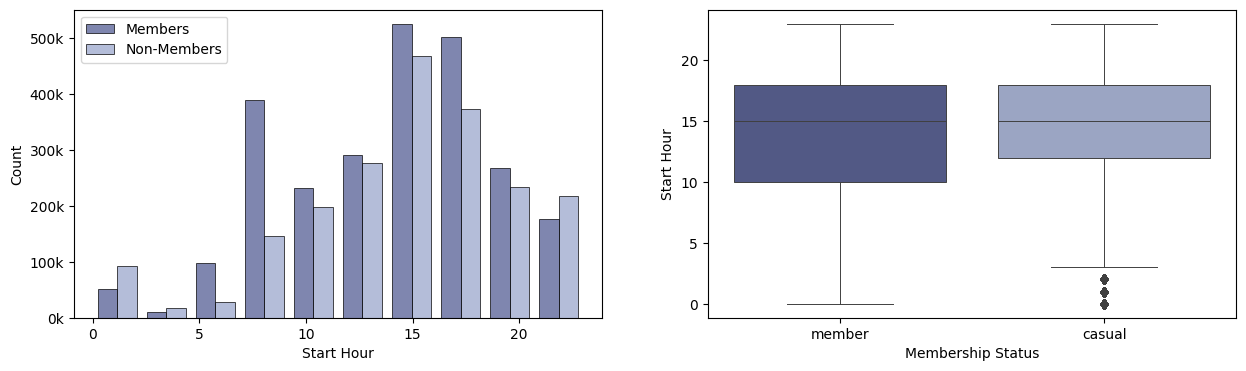

In [18]:
member = df[df['member_casual'] == 'member']
casual = df[df['member_casual'] == 'casual']
member_color = '#49538d'
casual_color = '#94a1ca'

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.hist([member['start_hour'], casual['start_hour']], color=[member_color, casual_color],
         label=['Members', 'Non-Members'], alpha=0.7, edgecolor='black', linewidth=0.7)
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.legend()

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}k'.format(x/1000)))

plt.subplot(1, 2, 2)
sns.boxplot(x='member_casual', y='start_hour', data=df,
            palette={'member': member_color, 'casual': casual_color}, linewidth=0.7)
plt.xlabel('Membership Status')
plt.ylabel('Start Hour')

plt.show()


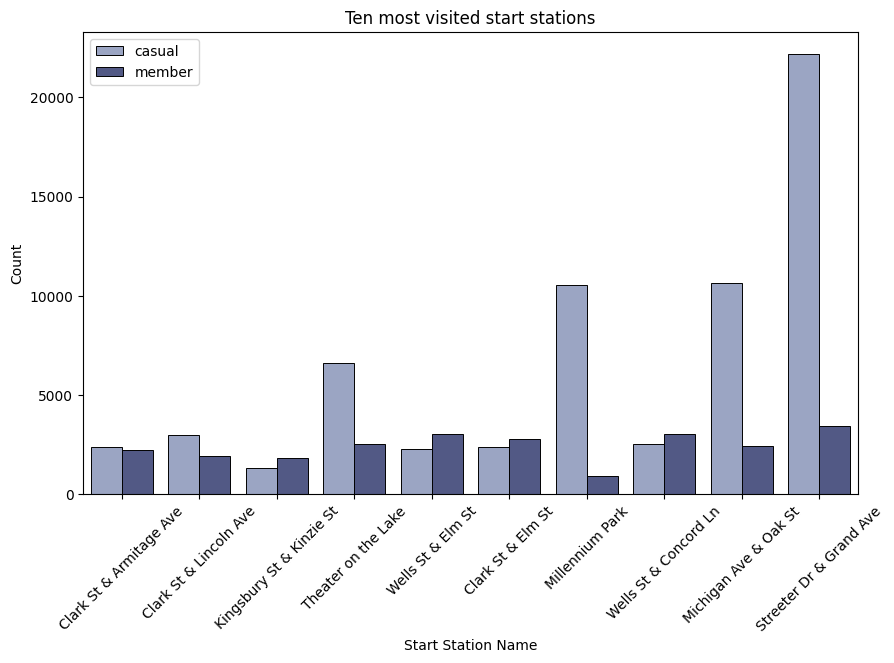

In [19]:
top_start_stations = df['start_station_name'].value_counts().head(10).index
top_end_stations = df['end_station_name'].value_counts().head(10).index
top_start_stations = sorted(top_start_stations, key=lambda x: df['start_station_name'].value_counts()[x])
top_end_stations = sorted(top_end_stations, key=lambda x: df['end_station_name'].value_counts()[x])

df_top_stations = df[df['start_station_name'].isin(top_start_stations) & df['end_station_name'].isin(top_end_stations)]

plt.figure(figsize=(10, 6))
sns.countplot(x='start_station_name', hue='member_casual', data=df_top_stations,
              palette = {'member': member_color, 'casual': casual_color},
              order = top_start_stations,
              linewidth = 0.7,
              edgecolor = 'black')
plt.title('Ten most visited start stations')
plt.xlabel('Start Station Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


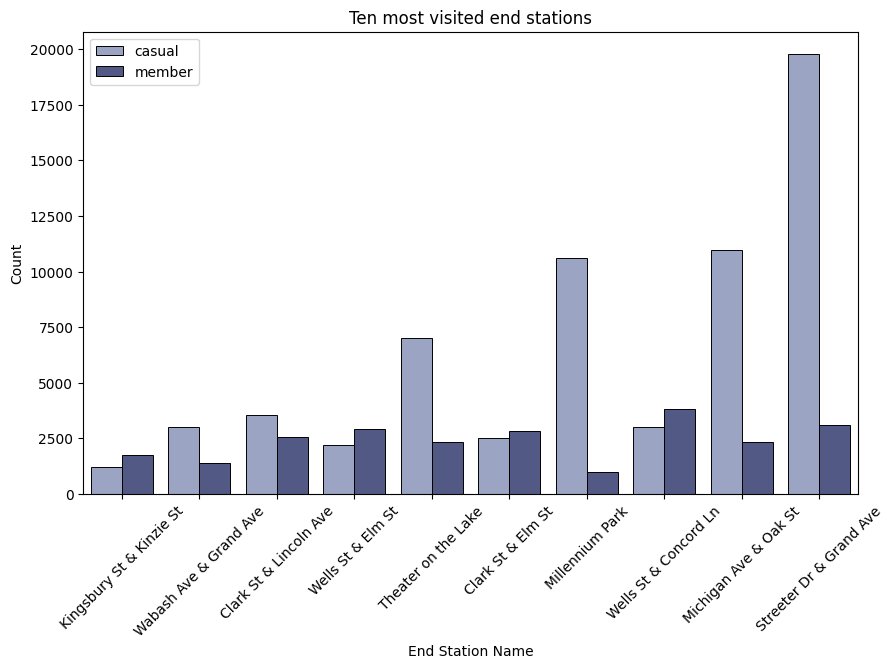

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='end_station_name', hue='member_casual', data=df_top_stations, palette = {'member': member_color, 'casual': casual_color},
              order = top_end_stations,
              linewidth = 0.7,
              edgecolor = 'black')
plt.title('Ten most visited end stations')
plt.xlabel('End Station Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


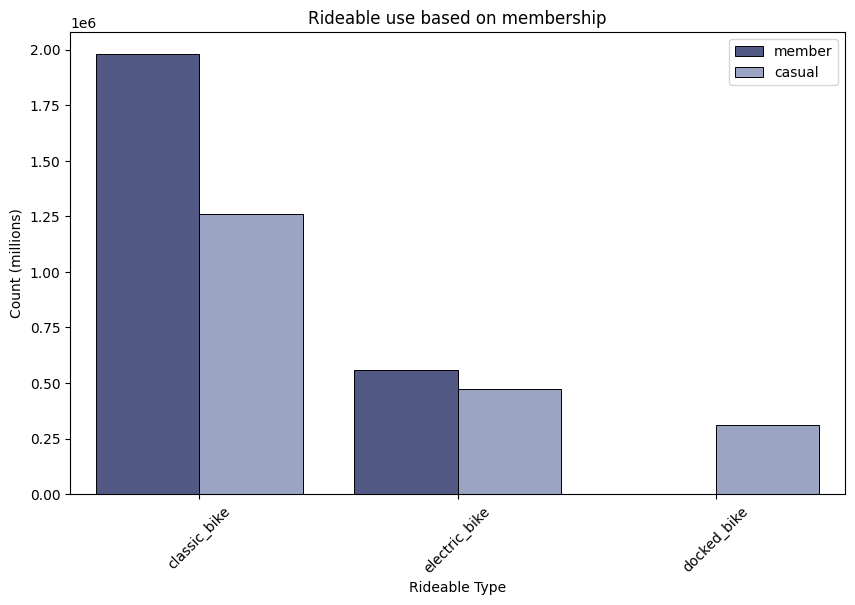

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'rideable_type', hue= 'member_casual', data = df, palette = {'member': member_color, 'casual': casual_color},
              order = df['rideable_type'].value_counts().index,
              linewidth = 0.7,
              edgecolor = 'black')
plt.title('Rideable use based on membership')
plt.xlabel('Rideable Type')
plt.ylabel('Count (millions)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


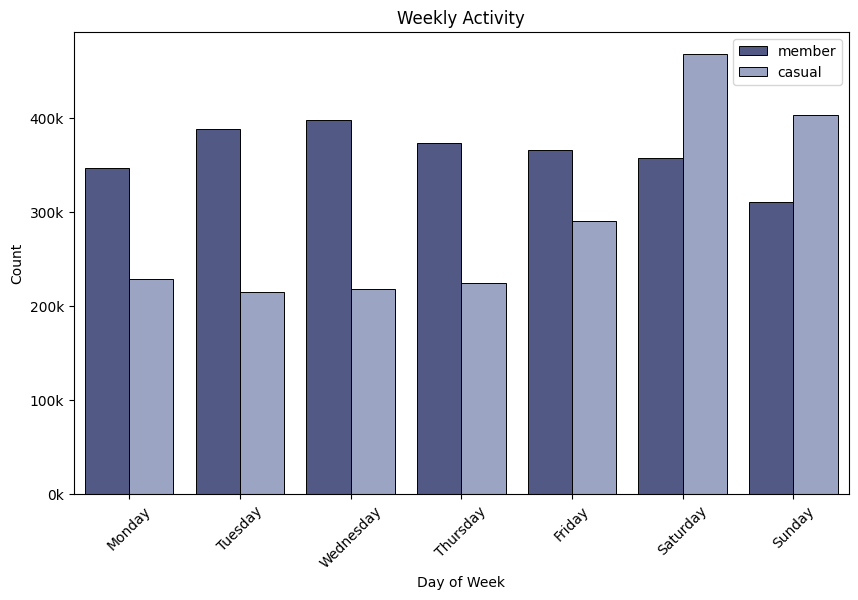

In [22]:
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(x = 'day_of_week', hue= 'member_casual', data = df, palette = {'member': member_color, 'casual': casual_color},
              order = custom_order,
              linewidth = 0.7,
              edgecolor = 'black')
plt.title('Weekly Activity')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}k'.format(x/1000)))
plt.show()


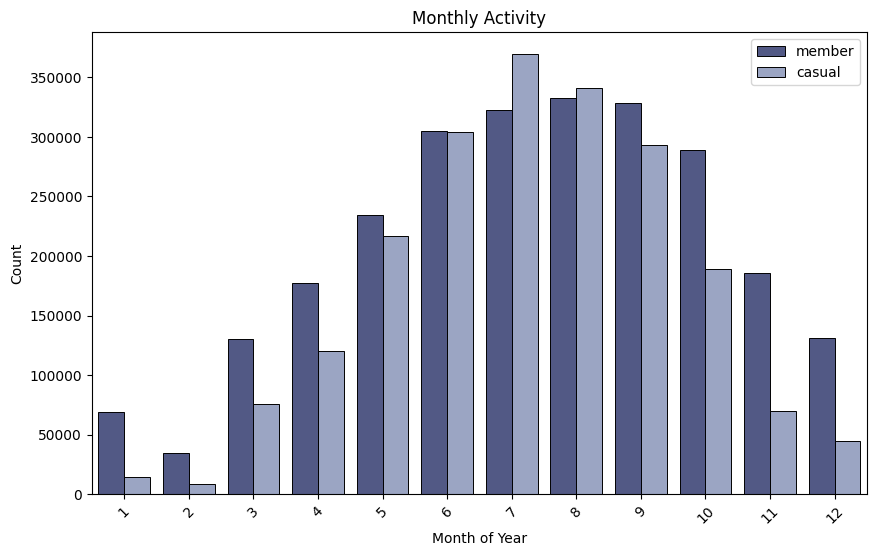

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'month', hue= 'member_casual', data = df, palette = {'member': member_color, 'casual': casual_color},
              order = range(1,13),
              linewidth = 0.7,
              edgecolor = 'black')
plt.title('Monthly Activity')
plt.xlabel('Month of Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
#plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}k'.format(x/1000)))
plt.show()


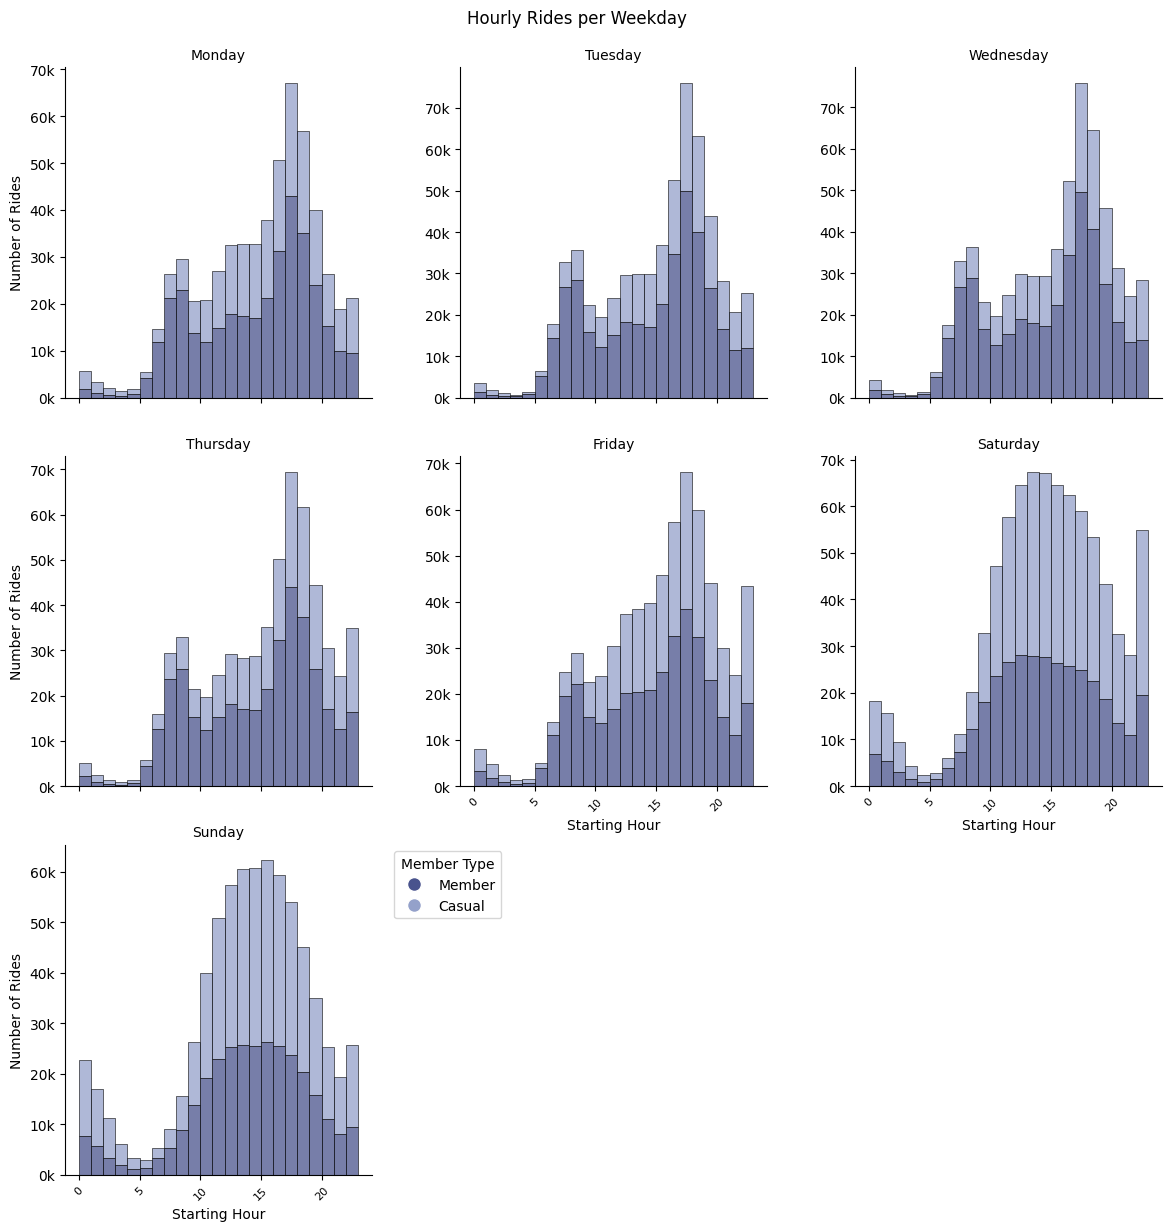

In [24]:
g = sns.FacetGrid(df, col='day_of_week', col_wrap=3, height=4, sharey=False,
                  col_order = custom_order)
g.map_dataframe(sns.histplot, x='start_hour', hue='member_casual',
                palette={'member': member_color, 'casual': casual_color},
                multiple = 'stack',
                binwidth = 1,
                edgecolor='black', linewidth=0.4,
                hue_order=['casual', 'member'])

# Labels and titles
g.set_axis_labels('Starting Hour', 'Number of Rides')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Hourly Rides per Weekday', y=1.02)

# Y-axis labels
def format_thousands(value, _):
    return '{:.0f}k'.format(value / 1000)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

# X-axis text rotation and size
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)

# Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=member_color, markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=casual_color, markersize=10)]
labels = ['Member', 'Casual']

plt.legend(handles, labels, title='Member Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [2]:
df.head()


,day_of_week,avg_duration,member_casual,avg_duration_minutes
0,Monday,10,Member,10
1,Tuesday,15,Casual,15
2,Wednesday,20,Member,20
3,Thursday,25,Casual,25
4,Friday,30,Member,30


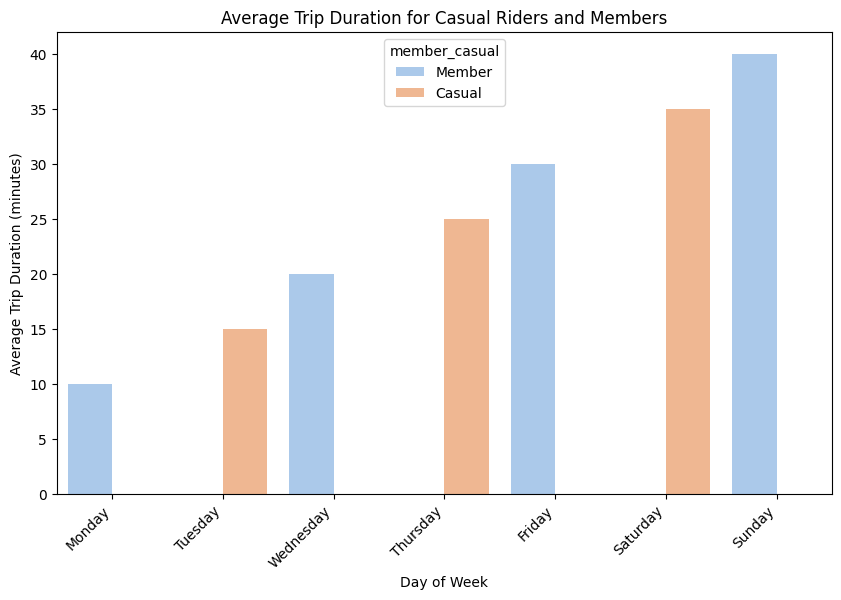

In [1]:
# Convert timedelta to numerical representation in minutes
df['avg_duration_minutes'] = df['avg_duration']  # Assuming 'avg_duration' is already in minutes

# Plotting using seaborn with vertical bars
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='avg_duration_minutes', hue='member_casual', data=df, dodge=True, palette='pastel')

# Adjusting plot aesthetics
plt.xlabel('Day of Week')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration for Casual Riders and Members')
plt.xticks(rotation=45, ha='right')

# Set x-axis ticks to the actual names of the weekdays
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=range(len(days_of_week)), labels=days_of_week)

plt.show()
